In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from matplotlib.lines import Line2D 

In [52]:
MI_idx = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/MI_idx.csv", index_col = None)
MI_idx['pol_med'] = MI_idx['politics'].apply(lambda x: 'conservative' if x > 4 else 'liberal' if x < 4 else 'centrist')
MI_idx['pol_med'] = MI_idx['pol_med'].apply(lambda x: np.nan if x == 'centrist' else x)
MI_idx

,condition,mental illness,difficulty changing,desired change,genes,punishment,control,wrongness,internal distress,common,politics,pol_med
0,pedophile,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,3,liberal
1,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,conservative
2,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,conservative
3,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,liberal
4,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,liberal
...,...,...,...,...,...,...,...,...,...,...,...,...
12215,schizophrenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,conservative
12216,schizophrenia,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,1,liberal
12217,schizophrenia,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,7,conservative
12218,schizophrenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,conservative


/Users/merieldoyle/opt/anaconda3/envs/ckMIconda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/q7/0p1jf63j7lx6ldgn2kdfqlz00000gn/T/ipykernel_77675/108165324.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in PWMI._legend.legendHandles:


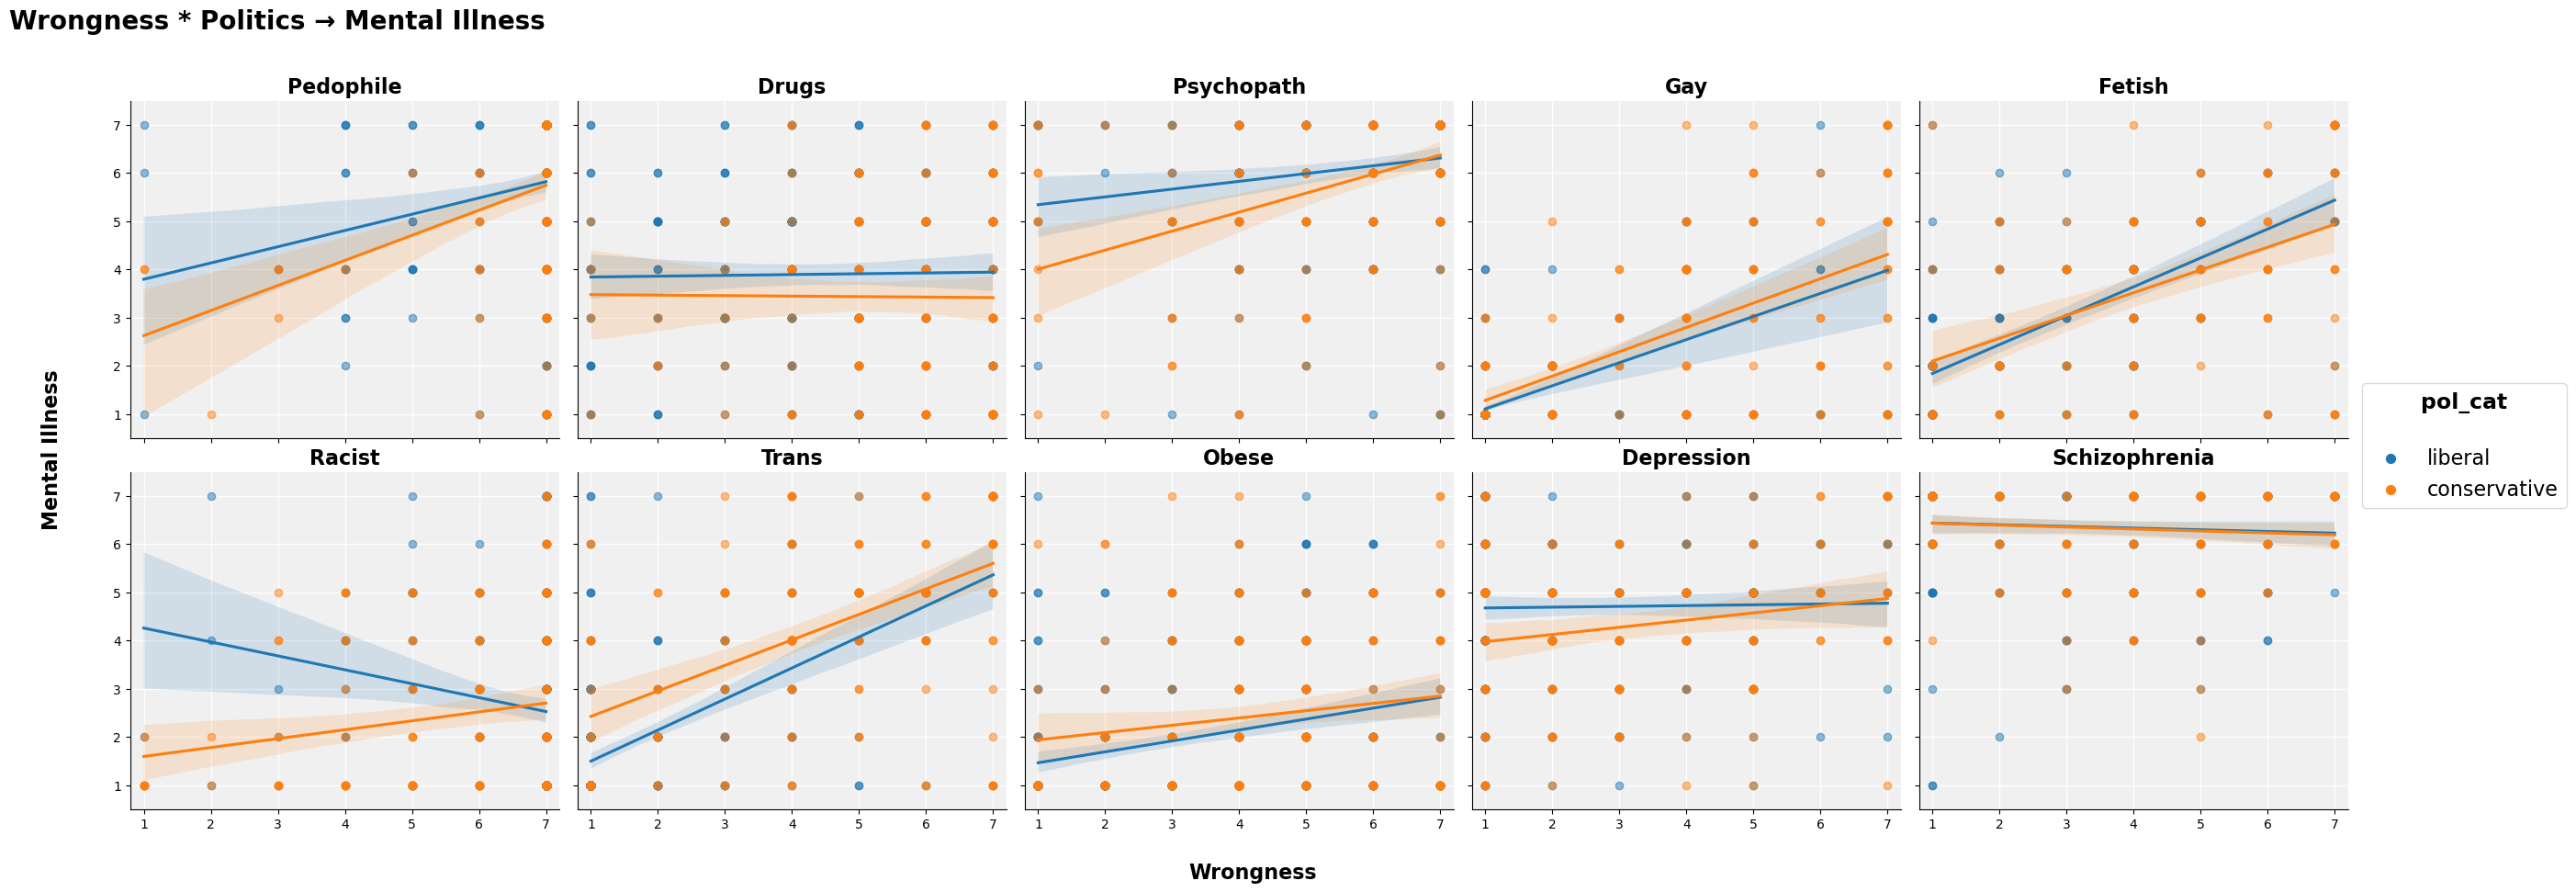

In [53]:
custom_titles = ['Pedophile', 'Drugs', 'Psychopath', 'Gay', 'Fetish',
                 'Racist', 'Trans', 'Obese', 'Depression', 'Schizophrenia']

PWMI = sns.lmplot(
    data = MI_idx, 
    x = 'wrongness', y = 'mental illness', 
    col = 'condition', hue = 'pol_med', col_wrap = 5,
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.5})

PWMI.set(ylim = (0.5, 7.5), xlim = (0.8, 7.2), ylabel = "", xlabel = "")

PWMI.add_legend(legend_data = PWMI._legend_data, 
              title = 'pol_cat\n', # \n adds a space between title and elements
              prop = {'size': 16}, 
              edgecolor = 'lightgray',
              frameon = True, fancybox = True) # legend title

PWMI._legend.get_title().set_weight('bold') # bold title
PWMI._legend.get_title().set_size('17') # bold title

for lh in PWMI._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
for ax, title in zip(PWMI.axes.flat, custom_titles):
    ax.set_title(title, fontsize = 16, fontweight = "bold")

PWMI.fig.suptitle('Wrongness * Politics → Mental Illness', x = 0.08, y = 0.93, size = 20, fontweight = "bold")
PWMI.fig.subplots_adjust(top = .83, hspace = 0.1)

PWMI.fig.text(0.47, -0.01, 'Wrongness', ha='center', va='center', fontsize=16, fontweight='bold') # common x-label
PWMI.fig.text(-0.01, 0.45, 'Mental Illness', ha='center', va='center', fontsize=16, fontweight='bold', rotation='vertical') # common y-label

for ax in PWMI.axes.flat:
    ax.set_facecolor('#F0F0F0')  # set background color
    ax.yaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint horizontal gridlines
    ax.xaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint vertical gridlines
    ax.set_axisbelow(True)  # put gridlines below bar plots

plt.show(PWMI)

In [54]:
MI_idx = MI_idx.rename(columns={"mental illness": "mental"})

def main_effects(group):
    PWMI_model = smf.ols(formula = 'mental ~ wrongness + politics', data = group).fit()
    PWMI_summary = PWMI_model.summary()
    print(PWMI_summary.tables[0], PWMI_summary.tables[1])

def interaction(group):
    PWMI_interaction = smf.ols(formula = 'mental ~ wrongness + politics + wrongness:politics', data = group).fit()
    summary = PWMI_interaction.summary()
    print(summary.tables[0], summary.tables[1])

In [64]:
pedophile = pd.DataFrame(MI_idx[:1222])
drugs = pd.DataFrame(MI_idx[1222:2444])
psychopath = pd.DataFrame(MI_idx[2444:3666])
gay = pd.DataFrame(MI_idx[3666:4888])
fetish = pd.DataFrame(MI_idx[4888:6110])
racist = pd.DataFrame(MI_idx[6110:7332])
transgender = pd.DataFrame(MI_idx[7332:8554])
obese = pd.DataFrame(MI_idx[8554:9776])
depression = pd.DataFrame(MI_idx[9776:10998])
schizophrenia = pd.DataFrame(MI_idx[10998:12220])

In [69]:
main_effects(racist)
interaction(racist)

                            OLS Regression Results                            
Dep. Variable:                 mental   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.154
Date:                Mon, 21 Aug 2023   Prob (F-statistic):              0.316
Time:                        10:46:04   Log-Likelihood:                -964.33
No. Observations:                 486   AIC:                             1935.
Df Residuals:                     483   BIC:                             1947.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

In [70]:
main_effects(pedophile)
interaction(pedophile)

                            OLS Regression Results                            
Dep. Variable:                 mental   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     13.60
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.80e-06
Time:                        10:46:42   Log-Likelihood:                -924.78
No. Observations:                 482   AIC:                             1856.
Df Residuals:                     479   BIC:                             1868.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

In [71]:
main_effects(psychopath)
interaction(psychopath)

                            OLS Regression Results                            
Dep. Variable:                 mental   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.20
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           9.70e-11
Time:                        10:46:58   Log-Likelihood:                -866.94
No. Observations:                 483   AIC:                             1740.
Df Residuals:                     480   BIC:                             1752.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

In [72]:
main_effects(transgender)
interaction(transgender)

                            OLS Regression Results                            
Dep. Variable:                 mental   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           2.69e-66
Time:                        10:48:35   Log-Likelihood:                -953.57
No. Observations:                 512   AIC:                             1913.
Df Residuals:                     509   BIC:                             1926.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

In [7]:
PWMI_model = smf.ols(formula = 'mental ~ wrongness + politics', data = MI_idx).fit()
PWMI_summary = PWMI_model.summary()
print(PWMI_summary.tables[0], PWMI_summary.tables[1])

PWMI_interaction = smf.ols(formula = 'mental ~ wrongness + politics + wrongness:politics', data = MI_idx).fit()
summary = PWMI_interaction.summary()
print(summary.tables[0], summary.tables[1])

                            OLS Regression Results                            
Dep. Variable:                 mental   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          4.19e-107
Time:                        07:08:44   Log-Likelihood:                -10711.
No. Observations:                4888   AIC:                         2.143e+04
Df Residuals:                    4885   BIC:                         2.145e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

In [8]:
custom_titles = ['Pedophile', 'Drugs', 'Psychopath', 'Gay', 'Fetish',
                 'Racist', 'Trans', 'Obese', 'Depression', 'Schizophrenia']

for condition in custom_titles:
    print(f"\nsignificance testing for condition: {condition}\n")
    
    condition_data = MI_idx[MI_idx['condition'] == condition]
    
    # main effects model
    PWMI_model = smf.ols(formula='mental ~ wrongness + politics', data=condition_data).fit()
    PWMI_summary = PWMI_model.summary()
    print(PWMI_summary.tables[0], PWMI_summary.tables[1])
    
    # interaction model
    PWMI_interaction = smf.ols(formula='mental ~ wrongness + politics + wrongness:politics', data=condition_data).fit()
    summary = PWMI_interaction.summary()
    print(summary.tables[0], summary.tables[1])


significance testing for condition: Pedophile



ValueError: zero-size array to reduction operation maximum which has no identity